# McHacks 2022 - COVID-19 Stringency Index Predictor

## Imports

In [7]:
import numpy as np
import math
import scipy as sp
import random
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pickle
from sklearn import tree

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(1234)

## Data

In [4]:
# Loading pre-processed csv file
all_df=pd.read_csv("/content/drive/MyDrive/McHacks 2022/McHacks_ALLcovid.csv")
all_df=shuffle(all_df)

print(all_df)

feature_names=all_df.columns

# Converting to numpy array for easier use
all_np=pd.DataFrame.to_numpy(all_df)

x_all=all_np[:,:15]
y_all=all_np[:,15]


# Normalizing features per million people
for i in range(4):
  x_all[:,i]=x_all[:,i]/all_np[:,16]*10**6
  

for i in [5,6]:
  x_all[:,i]=x_all[:,i]/all_np[:,16]*10**6

for i in range(9,15):
  x_all[:,i]=x_all[:,i]/all_np[:,16]*10**6
  

# Splitting data into training and test
x_all_trn, x_all_test, y_all_trn, y_all_test = train_test_split(x_all, y_all, test_size=0.15, shuffle=True)


       new_cases  new_cases_smoothed  ...  stringency_index  population
1084         236             240.000  ...             62.96     6896655
7361       22133           22472.429  ...             56.48    17173094
1684          77             148.429  ...             62.96      896005
3175           7              10.714  ...             37.96     1325188
13922      11597           12157.714  ...             58.80   332915074
...          ...                 ...  ...               ...         ...
6420          93              80.429  ...             45.37      516100
3745         429             855.286  ...             34.26     1325188
13055        226             352.571  ...             67.13    38067913
5058         -23             302.143  ...             50.00     4982904
5651       12900           20582.857  ...             79.63    60367471

[14135 rows x 17 columns]


## Decision Tree

#### Default parameter model

In [5]:
# Fit 
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(x_all_trn, y_all_trn)

# Predict
y_all_pred = dt_model.predict(x_all_test)

score=dt_model.score(x_all_test,y_all_test)
mse=mean_squared_error(y_all_test,y_all_pred)

print(f'MSE = {mse}')
print(f'score = {score}')


MSE = 29.96656506364922
score = 0.8889501847631854


#### Hyperparameter tuning

In [9]:
best_score=0

# Tuning maximum tree depth and minimum number of samples for split

for depth in np.arange(1,20):
  for nb_samples in np.arange(2,20):
    dt_model = DecisionTreeRegressor(max_depth=depth,min_samples_split=nb_samples,random_state=0)
    score_all = cross_val_score(dt_model, x_all, y_all, cv=5).mean()
    
    if score_all>best_score:
      best_samples=nb_samples
      best_depth = depth
      '''best_score_na = score_na
      best_score_oc=score_oc'''
      best_model = dt_model
      best_score=score_all

print(f'Best cross validation score : {best_score} found with depth {best_depth} and min_samples to split {nb_samples}')

Best cross validation score : 0.8578594300071269 found with depth 19 and min_samples to split 19


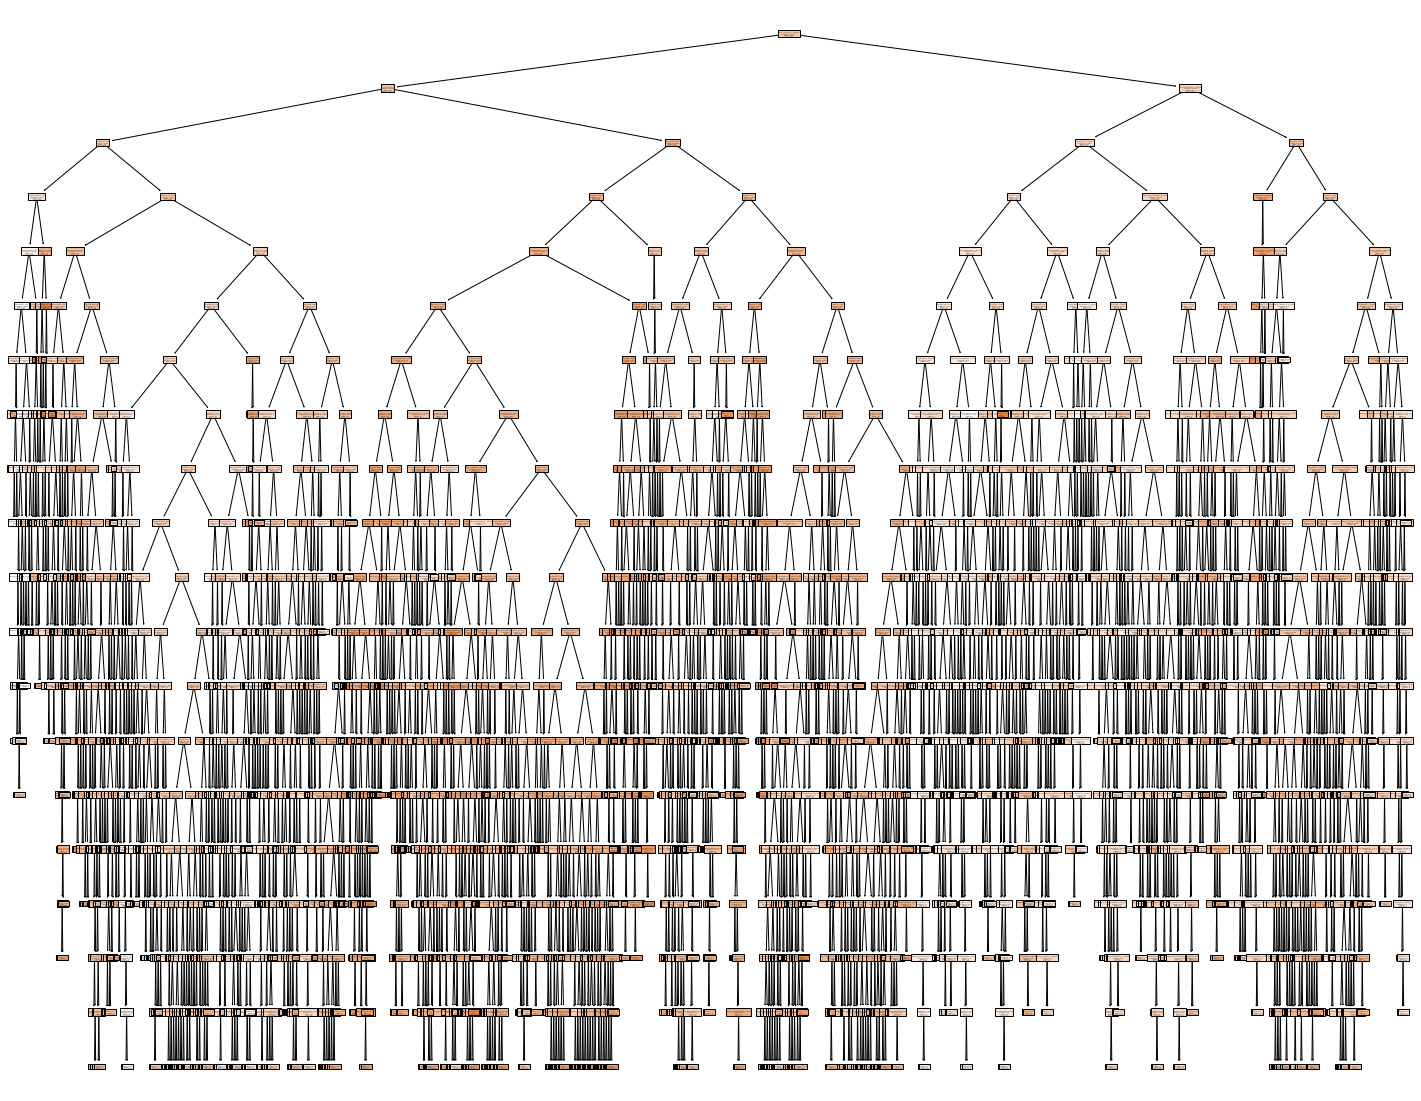

In [13]:
fig = plt.figure(figsize=(25,20))
best_model.fit(x_all_trn,y_all_trn)
best_model.predict(x_all_test)
_ = tree.plot_tree(best_model, 
                   feature_names=feature_names,  
                   filled=True)

## Random Forests

#### Default parameter model

In [ ]:
# Fit 
rf_model=RandomForestRegressor(random_state=0)
rf_model.fit(x_all_trn,y_all_trn)

# Predict
y_all_pred=rf_model.predict(x_all_test)

score=rf_model.score(x_all_test,y_all_test)
print(f"score: {score}")

score: 0.926671351005311


#### Hyperparameter tuning

In [ ]:
best_score=0

# Tuning number of trees in forest and maximum depth of tree

for nb_estimators in np.arange(50,300,50):
  for depth in np.arange(2,50,2):
    rf_model=RandomForestRegressor(n_estimators=nb_estimators,max_depth=depth,random_state=0)
    score_all = cross_val_score(rf_model, x_all, y_all, cv=5).mean()
    
    if score_all>best_score:
      best_depth = depth
      best_nb_est=nb_estimators
      best_model = rf_model
      best_score=score_all

print(f'best cross validation score : {best_score} found with depth {best_depth} and num of estimators {best_nb_est}')


best cross validation score : 0.9390965206599582 found with depth 28 and num of estimators 200


## Final model test performance RF : 200 trees, max_depth = 28




In [ ]:
# Fit 
rf_model=RandomForestRegressor(n_estimators=200,max_depth=28,random_state=0)
rf_model.fit(x_all_trn,y_all_trn)

# Predict
y_all_pred=rf_model.predict(x_all_test)

# Test score
score=rf_model.score(x_all_test,y_all_test)

print(f'Test score: {score}')



Test score: 0.9514794515166656
